In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
! kaggle datasets download -d biaiscience/dogs-vs-cats

 99% 806M/817M [00:14<00:00, 73.3MB/s]
100% 817M/817M [00:14<00:00, 59.7MB/s]


In [ ]:
! unzip *.zip -d dogs-cats-images

Streaming output truncated to the last 5000 lines.
  inflating: dogs-cats-images/train/train/dog.55.jpg  
  inflating: dogs-cats-images/train/train/dog.550.jpg  
  inflating: dogs-cats-images/train/train/dog.5500.jpg  
  inflating: dogs-cats-images/train/train/dog.5501.jpg  
  inflating: dogs-cats-images/train/train/dog.5502.jpg  
  inflating: dogs-cats-images/train/train/dog.5503.jpg  
  inflating: dogs-cats-images/train/train/dog.5504.jpg  
  inflating: dogs-cats-images/train/train/dog.5505.jpg  
  inflating: dogs-cats-images/train/train/dog.5506.jpg  
  inflating: dogs-cats-images/train/train/dog.5507.jpg  
  inflating: dogs-cats-images/train/train/dog.5508.jpg  
  inflating: dogs-cats-images/train/train/dog.5509.jpg  
  inflating: dogs-cats-images/train/train/dog.551.jpg  
  inflating: dogs-cats-images/train/train/dog.5510.jpg  
  inflating: dogs-cats-images/train/train/dog.5511.jpg  
  inflating: dogs-cats-images/train/train/dog.5512.jpg  
  inflating: dogs-cats-images/train/train

In [ ]:
import cv2
import os
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

TRAIN_DIR = '/content/dogs-cats-images/train/train'
TEST_DIR = '/content/dogs-cats-images/test/test'
IMAGE_SIZE=224

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_images = [os.path.join(TRAIN_DIR,i) for i in os.listdir(TRAIN_DIR)] 
train_dogs =   [os.path.join(TRAIN_DIR,i)for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats =   [os.path.join(TRAIN_DIR,i) for i in os.listdir(TRAIN_DIR) if 'cat' in i]
test_images =  [os.path.join(TEST_DIR,i) for i in os.listdir(TEST_DIR)]

In [ ]:
train_images=train_dogs[:4000]+train_cats[:4000]
test_images=test_images[:1500]

In [ ]:
y_train=[1]*4000+[0]*4000

In [ ]:
def read_img(file_path):
    img=cv2.imread(file_path)
    img2=cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE), interpolation=cv2.INTER_CUBIC)
    return img2

In [ ]:
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, IMAGE_SIZE, IMAGE_SIZE,3), dtype=np.float32)

    for i, image_file in enumerate(images):
        image = read_img(image_file);
        image_data = np.array (image, dtype=np.float32);
        data[i] = image_data;
        if i%1000 == 0: print('Processed {} of {}'.format(i, count))    
    return data

In [ ]:
X_train=prep_data(train_images)
X_test=prep_data(test_images)

Processed 0 of 8000
Processed 1000 of 8000
Processed 2000 of 8000
Processed 3000 of 8000
Processed 4000 of 8000
Processed 5000 of 8000
Processed 6000 of 8000
Processed 7000 of 8000
Processed 0 of 1500
Processed 1000 of 1500


In [ ]:
y_train=np.array(y_train)

In [ ]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([4000, 4000]))

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

Using TensorFlow backend.


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Reshape,Activation,Reshape,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=7)

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3),kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(224,224,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.5))

    model.add(Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001),input_shape=(224,224,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001),input_shape=(224,224,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.5))

    model.add(Conv2D(64, (5, 5), kernel_regularizer=tf.keras.regularizers.l2(0.001),input_shape=(224,224,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5),kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(224,224,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.3))

    model.add(Flatten())

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # model.add(Dense(64))
    # model.add(BatchNormalization())
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    return model



# model = Sequential()
# model.add(ResNet50(include_top=False, pooling='max', weights='imagenet'))
# model.add(Dropout(0.2))
# model.add(Dense(2, activation='softmax'))
# # ResNet-50 model is already trained, should not be trained
# model.layers[0].trainable = True



In [ ]:
model=create_model()
model.compile(loss='categorical_crossentropy',
		optimizer='adam',
		metrics=['accuracy'])

In [ ]:
checkpoint_path = "G:/CheckPoints/Dogs Vs Cats/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback =ModelCheckpoint(filepath=checkpoint_path,
                                          save_weights_only=True,
                                                 verbose=1)


In [ ]:
train_model = model.fit(X_train,y_train ,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
    callbacks=[cp_callback])

Epoch 1/50
100/100 [==============================] - ETA: 0s - loss: 1.1138 - accuracy: 0.5805
Epoch 00001: saving model to G:/CheckPoints/Dogs Vs Cats/cp.ckpt
100/100 [==============================] - 28s 276ms/step - loss: 1.1138 - accuracy: 0.5805 - val_loss: 2.3035 - val_accuracy: 0.5475
Epoch 2/50
100/100 [==============================] - ETA: 0s - loss: 0.9227 - accuracy: 0.6828
Epoch 00002: saving model to G:/CheckPoints/Dogs Vs Cats/cp.ckpt
100/100 [==============================] - 27s 271ms/step - loss: 0.9227 - accuracy: 0.6828 - val_loss: 0.9286 - val_accuracy: 0.6419
Epoch 3/50
100/100 [==============================] - ETA: 0s - loss: 0.8302 - accuracy: 0.7302
Epoch 00003: saving model to G:/CheckPoints/Dogs Vs Cats/cp.ckpt
100/100 [==============================] - 27s 271ms/step - loss: 0.8302 - accuracy: 0.7302 - val_loss: 0.9211 - val_accuracy: 0.6650
Epoch 4/50
100/100 [==============================] - ETA: 0s - loss: 0.7293 - accuracy: 0.7755
Epoch 00004: saving

In [ ]:
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

In [ ]:
Loss,Accuracy=model.evaluate(X_train,y_train)

In [ ]:
print('Loss on Training Set = ',Loss)
print('Accuracy on Training Set = ',Accuracy)

Loss on Training Set =  0.259930282831192
Accuracy on Training Set =  0.9740625023841858


In [ ]:
Loss,Accuracy=model.evaluate(X_val,y_val)

50/50 [==============================] - 2s 50ms/step - loss: 0.6942 - accuracy: 0.8500


In [ ]:
print('Loss of Validation Set = {}',.format(Loss))
print('Accuracy of Validation Set = {}',.format(Accuracy))

In [ ]:
history_dict=train_model.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss=history_dict['loss']
accuracy=history_dict['accuracy']
val_loss=history_dict['val_loss']
val_accuracy=history_dict['val_accuracy']
epochs=range(1,len(history_dict['loss'])+1)

Text(0.5, 1.0, 'Loss on Training Set vs Loss on Validation Set')

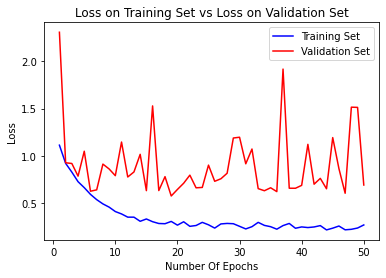

In [ ]:
fig,ax=plt.subplots()
ax.plot(epochs,loss,color="b",label="Training Set")
ax.plot(epochs,val_loss,color="r",label="Validation Set")
ax.legend()
ax.set_xlabel("Number Of Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss on Training Set vs Loss on Validation Set")

Text(0.5, 1.0, 'Accuracy on Training Set vs Accuracy on Validation Set')

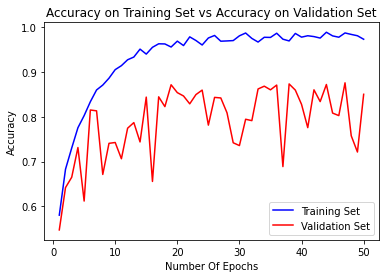

In [ ]:
fig,ax=plt.subplots()
ax.plot(epochs,accuracy,color="b",label="Training Set")
ax.plot(epochs,val_accuracy,color="r",label="Validation Set")
ax.legend()
ax.set_xlabel("Number Of Epochs")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy on Training Set vs Accuracy on Validation Set")

In [ ]:
a=train_model.predict(X_test[0])
plt.imshow(X_test[0])
print(a)

AttributeError: ignored

In [ ]:
X_test.shape

(1500, 224, 224, 3)

In [ ]:
np.argmax(model.predict(X_test[1:10]]),axis=1)

SyntaxError: ignored

In [ ]:
np.random.seed(2)
permutation = np.random.permutation(train_labels.shape[0])
X_train = train_normalized[permutation,:,:] 
y_train= train_labels[permutation]

In [ ]:
y_train = (y_train=='cat').astype(np.float32)